In [1]:
from cnn_model import create_model
from load_datasets import load_preprocess

2023-11-04 16:32:59.071248: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 16:32:59.071655: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 16:32:59.073612: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-04 16:32:59.584293: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_generator, validation_generator, test_generator = load_preprocess('data', 'train', 'test', 'validation')
model = create_model()
model.summary()

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


2023-11-04 16:33:17.247847: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-04 16:33:17.536131: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-04 16:33:17.536172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-04 16:33:17.539857: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-04 16:33:17.540050: I tensorflow/compile

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 128)       0

In [21]:
model.fit_generator(train_generator, epochs=100, validation_data=validation_generator)

/tmp/ipykernel_9516/344455219.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=100, validation_data=validation_generator)


Epoch 1/100
79/79 [==============================] - 46s 570ms/step - loss: 0.0407 - accuracy: 0.9861 - val_loss: 0.0791 - val_accuracy: 0.9697
Epoch 2/100
79/79 [==============================] - 14s 174ms/step - loss: 0.0379 - accuracy: 0.9857 - val_loss: 0.0675 - val_accuracy: 0.9697
Epoch 3/100
79/79 [==============================] - 16s 194ms/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.1321 - val_accuracy: 0.9394
Epoch 4/100
79/79 [==============================] - 16s 196ms/step - loss: 0.0356 - accuracy: 0.9877 - val_loss: 0.1117 - val_accuracy: 0.9697
Epoch 5/100
79/79 [==============================] - 15s 184ms/step - loss: 0.0323 - accuracy: 0.9885 - val_loss: 0.0663 - val_accuracy: 0.9697
Epoch 6/100
79/79 [==============================] - 15s 183ms/step - loss: 0.0313 - accuracy: 0.9889 - val_loss: 0.1897 - val_accuracy: 0.8788
Epoch 7/100
79/79 [==============================] - 15s 184ms/step - loss: 0.0286 - accuracy: 0.9901 - val_loss: 0.1406 - val_accuracy:

KeyboardInterrupt: 

In [10]:
history = model.history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

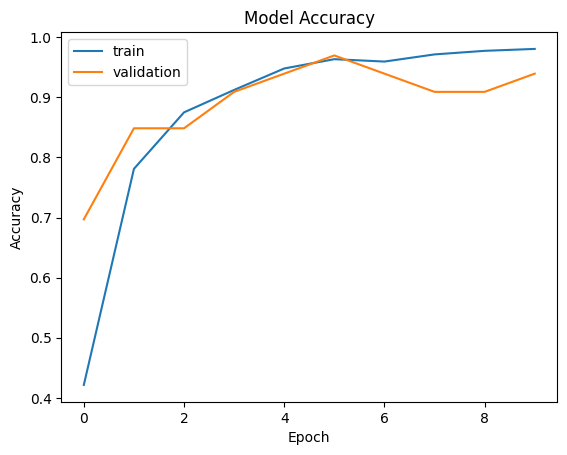

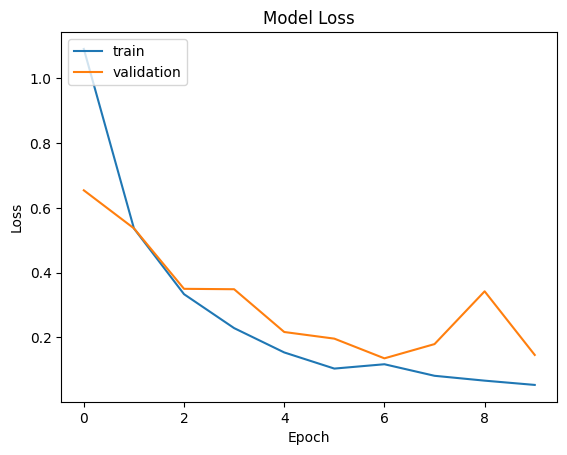

In [22]:
import matplotlib.pyplot as plt

# plot training and validation accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# plot training and validation loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [23]:
history_old = []
history_old.append(history['accuracy'])
history_old.append(history['val_accuracy'])
history_old.append(history['loss'])
history_old.append(history['val_loss'])
history_old.append(model.evaluate_generator(test_generator))

import pickle
with open('history_old.pkl', 'wb') as f:
    pickle.dump(history_old, f)

model.save('model.h5')

/tmp/ipykernel_9516/379119935.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  history_old.append(model.evaluate_generator(test_generator))
/home/brigh/exit/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2023-11-04 17:13:49.764992: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21233664 exceeds 10% of free system memory.
2023-11-04 17:13:49.890425: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21233664 exceeds 10% of free system memory.
2023-11-04 17:13:49.909872: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21233664 exceeds 10% of free system memory.


In [28]:
import numpy as np
from keras.preprocessing import image

# load an image to make prediction
img_path = '/home/brigh/Projects/make-a-ton/data/validation/scissor/scissors2.png'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# make prediction
prediction = model.predict_generator(img_tensor)
if prediction[0][0] > prediction[0][1]:
    print('Paper')
elif prediction[0][1] > prediction[0][2]:
    print('Rock')
else:
    print('Scissor')


/tmp/ipykernel_9516/3123697576.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prediction = model.predict_generator(img_tensor)


Scissor


In [6]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing import image

# Load the pre-trained model
model = load_model('model.h5')

# Define the labels
labels = ['paper', 'rock', 'scissor']

# Initialize the video capture object
cap = cv2.VideoCapture(0)  # Use the default camera (change the index if needed)

if not cap.isOpened():
    print("Camera is not opened!")
else:
    while True:
        # Read a frame from the video capture object
        ret, frame = cap.read()

        if frame is not None:
            # Preprocess the frame
            img = cv2.resize(frame, (150, 150))
            img_tensor = image.img_to_array(img)
            img_tensor = np.expand_dims(img_tensor, axis=0)
            img_tensor /= 255.

            # Make prediction
            prediction = model.predict(img_tensor)[0]
            index = np.argmax(prediction)
            label = labels[index]

            # Display the label on the frame
            cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Display the frame
            cv2.imshow('Frame', frame)

        # Exit if 'q' is pressed or window is closed
        key = cv2.waitKey(1)
        if key == ord('q') or key == 27:  # 'q' key or ESC key
            break

    # Release the video capture object and close all windows
    cap.release()
    cv2.destroyAllWindows()


Camera is not opened!


[ WARN:0@1509.121] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@1509.121] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range
